# Galaxy_Rotation_Curve_Dark_Matter_cosmo_master_students_hrvdole

Notebook simulating a galaxy rotation curve

Pr Hervé Dole, Université Paris-Saclay, 20251022


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Paramètres du modèle
R = 10  # Rayon de la galaxie (unité arbitraire)
rho = 1  # Densité constante (unité arbitraire)
M = 4/3 * np.pi * R**3 * rho  # Masse totale de la galaxie


In [3]:
# Plage de r
r = np.linspace(0.5, 20, 200)


In [4]:
# Régime (P) proche : 0 < r < R, v^2 ∝ r^2
v2_P = (4/3 * np.pi * rho) * r**2
v2_P[r >= R] = np.nan  # On ne trace que pour r < R


In [5]:
# Régime (L) lointain : r >> R, v^2 ∝ 1/r (sans matière noire)
v2_L = M / r
v2_L[r <= R] = np.nan  # On ne trace que pour r > R


In [6]:
# Courbe de rotation observée (plate)
v_obs = np.sqrt(M / R)  # Vitesse constante pour r > R
v2_obs = np.where(r < R, v2_P, v_obs**2)


In [7]:
# Simulation de données observées avec bruit
np.random.seed(42)
v2_obs_noisy = v2_obs + np.random.normal(0, 5, len(r))  # Bruit gaussien
v2_obs_noisy = np.abs(v2_obs_noisy)  # Éviter les valeurs négatives


In [8]:
# Courbe "sans matière noire" (théorique)
v2_no_dm = np.where(r < R, v2_P, v2_L)


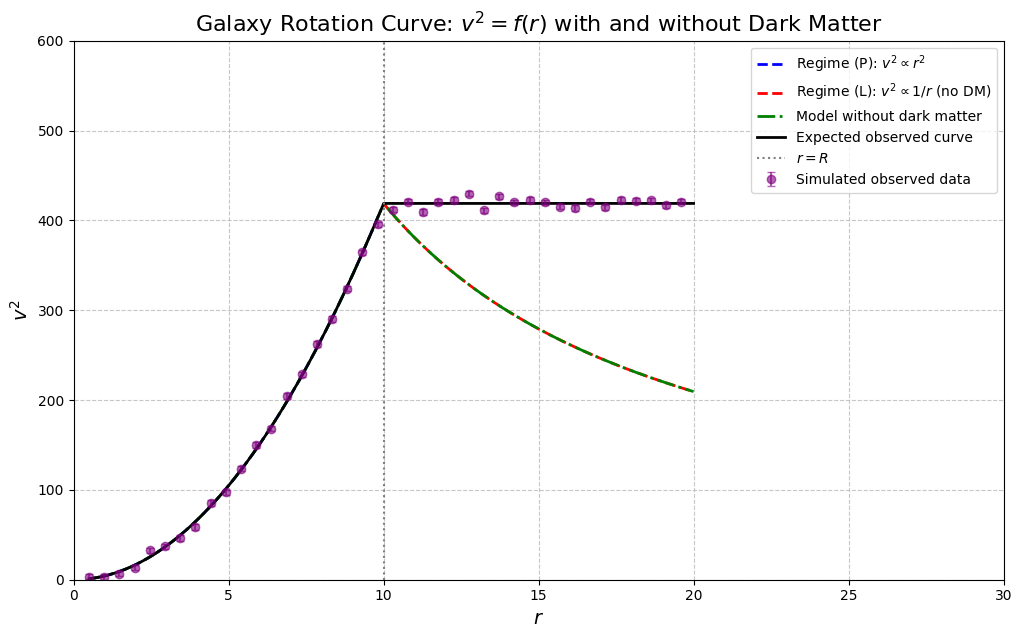

In [12]:
# Figure
plt.figure(figsize=(12, 7))
plt.plot(r, v2_P, '--b', label=r'Regime (P): $v^2 \propto r^2$', linewidth=2)
plt.plot(r, v2_L, '--r', label=r'Regime (L): $v^2 \propto 1/r$ (no DM)', linewidth=2)
plt.plot(r, v2_no_dm, '-.g', label=r'Model without dark matter', linewidth=2)
plt.plot(r, v2_obs, '-k', label='Expected observed curve', linewidth=2)
plt.errorbar(r[::5], v2_obs_noisy[::5], yerr=3, fmt='o', color='purple', alpha=0.6,
             label='Simulated observed data', capsize=3)
plt.axvline(x=R, color='gray', linestyle=':', label=r'$r = R$')
plt.xlabel(r'$r$', fontsize=14)
plt.ylabel(r'$v^2$', fontsize=14)
plt.title(r'Galaxy Rotation Curve: $v^2 = f(r)$ with and without Dark Matter', fontsize=16)
plt.legend(fontsize=10, loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlim(0, 30)
plt.ylim(0, 600)
plt.show()
